In this simulation we are calculating TTT and CCT diagrams for following the cooling behaviour of the PM Steels.
The current notebook follows presentation given by A.Malakizadi:

Diploma work No. 42/2010
at Department of Materials and Manufacturing Technology
CHALMERS UNIVERSITY OF TECHNOLOGY
Gotheburg Sweden


# Constitutive equation and finite element formulation

Heat equation is given here in the general form to model also the phase transformations during the phase transformations of the alloy:

Conservation of the energy is given by the equation:
$$
\rho \frac{\partial E}{\partial t} - \nabla(k\nabla T)= 0
$$
where the E is specific internal energy. $ \rho, k$ and $T,t$ are density, thermal conductivity, temperature and time.
Specific internal energy can also be represented using:
$$
E(t,x)= e(T,X_i)
$$
where $ X_i $ for $i={1,2,3,4}$ are volume fraction for example of the perlite, bainite, ferrite and martensite phase.
Differenting the $e(T,X_i)$ with the respect to internal variables:
$$
\frac{\partial e}{\partial T} = c_p \\
\frac{\partial e}{\partial X_i}=-q_i
$$
Thus the general equation is given by:

$$
\rho(T)c_p(T)\frac{\partial T}{\partial t}=\frac{\partial }{\partial x}(k(T)\frac{\partial T}{\partial x}) +
\frac{\partial }{\partial y}(k(T)\frac{\partial T}{\partial y})+\frac{\partial }{\partial z}(k(T)\frac{\partial T}{\partial z})
+\sum{\rho_i(T)q_i(T) \frac{\partial X_i}{\partial t}}
$$

It is important to set also the correct boundary conditions and initial boundary conditions  for the cooling:

Cooling condition for radiation and air convection:
$$
-k\frac{\partial T}{\partial n} = h_c(T) (T-T_{\infty})+\sigma\epsilon(T)(T^{4}-T^{4}_\infty)
$$
If we are cooling by water or quenching:
$$
-k\frac{\partial T}{\partial n} = h_q(T) (T-T_{\infty})
$$
And the start temperature of the sample is given:
$$
T_0 = T(x,y,0)
$$
here the $h_c(T)$ is the convective heat transfer coefficient, $\sigma$ is the Stefan-Boltzmann constant, and $\epsilon $ is radiation emissivity of the surface and $T_\infty$ is the sorounding temperature.
It is possible to reduce the surface radiation to:
$$
\sigma \epsilon(T) (T^4-T^4_\infty)= \sigma \epsilon(T)(T^2+T^2_\infty)(T+T_\infty)(T-T_\infty)=h_r(T)(T-T_\infty)
$$
So combined radiation and convection boundary condition can be expressed by:
$$
-k\frac{\partial T}{\partial n}=h_r(T)(T-T_\infty)+h_c(T) (T-T_{\infty})=h_{rc}(T)(T-T_{\infty})
$$
where $h_{rc}$ is combined heat transfer.  

$$
\rho(T)c_p(T) \frac{\partial T}{\partial t} =k(T)\left( \frac{1}{r}  \frac{\partial }{\partial r}(r\frac{\partial T}{\partial r})+ \frac{\partial^2 T}{\partial z^2}\right)+\sum{\rho_i(T)q_i(T)\frac{\partial X_i}{\partial t}}
$$

## Incoperation of the phase transformation terms

Phase transformation in weak formulation for the phase transformation.
$$
R = \int_{\Gamma}{w rh_{rc} T_\infty}+\int_{\omega} w\sum{\rho_i q_i \frac{\partial X_i}{\partial t} rdrdz}
$$
At constant pressure is the latent heat of transformations are equal to entalphy changes $\rho q_i = \Delta H_i$

$$
R=\int_{\Gamma}{w rh_{rc} T_\infty}+\int_{\omega} w\sum{\Delta H_i \frac{\partial X_i}{\partial t} rdrdz}
$$
Time derivative can be approximated:
$$
\frac{\partial X_i}{\partial t} = \frac{\Delta X_i}{\Delta t}=\frac{X_i^{j+1}-X_i^{j}}{\Delta t}
$$
where $X^{j+1}_i$ is the volume fraction of the phase $i$ at time $j+1$. The thermal properties of the mixture are calculated
using the mixture rule:
$$
\rho c_p = \sum{X_i\rho_i c_{p_i}} \\
k = \sum{X_i k_i}
$$
Both models JMAK and AR model can be used to calculate the amount of the diffusive transformation. We focus now on the JMAK model.


# Scheil principle


The kinetics of the transformation during cooling (anisothermal condition) according to Scheil principle can the approximated by means of infinitesimal time increments $\Delta t$ and ficitious time $t^{*}$ need to gain same fraction of phase $i$ at the current temperature $T_j$

$$
t_j = \Delta t + t_j^{*}
$$
where we can calculate $t^{*}$ from JMAK model as:
$$
t_j^{*} = \left [ \frac{ln(\frac{1}{1-X_{i,j-1}})}{k(T_j)}\right]
$$
In the case of the remaining austenite phase we should correct $X_{i,j-1}$ with:
$$
F_{i,j-1}=\frac{X_{i,j-1}}{X_{i,j-1}+X_{\gamma,j-1}}
$$
then previous equation is written as:
$$
t_j^{*} = \left [ \frac{ln(\frac{1}{1-F_{i,j-1}})}{k(T_j)}\right]
$$
So we can calculate then the fictious volume fraction of phase $i$ at time $j$:
$$
F_{i,j}^{*}=1-exp\left(-k(T_j)t_j^{n(T_j)} \right)
$$
The incubation time of the diffusive transformation are calculated using equation:
$$
Q = \int_{0}^{t} \frac{d\epsilon}{\tau_s(T(\epsilon))}= \sum\frac{\Delta t}{\tau_s(T_j)}
$$


In [1]:
rho=7800; Cp=600.0; k=37.0; alpha=k/(Cp*rho)
def h(T):
    if (T < (225+273)):
        return 20.0
    elif ( (225+273) < T < (800+273) ):
        return -2.11e-9 * T**4 + 3.78e-6 * T**3 -0.00217*T**2 + 0.555*T-32.47
    else:
        return 92.5
    
    

Assuming that the Jominy test can be treated as the semi-infinite plate. The surface exposed to convective boundary condition exposed on one side, the analytical solution is given as:
$$
\frac{T(x,t)-T_i}{T_{\infty}-T_i}=erfc \left(\frac{x}{2\sqrt{\alpha t}}\right) - exp\left(\frac{h x }{k}+\frac{h^2 \alpha t }{k^2}\right)
erfc\left(\frac{x}{2\sqrt{\alpha t}} + \frac{h\sqrt{\alpha t} }{k}\right)
$$
The temperature distribution of the bar at different position $x$ and time $t$ can be obtained if we know distribution of temperature $T$ at previous time step $t_{i-1}$.

In [2]:
import math
def T(x,t,T):
    return math.erfc(x/(2*math.sqrt(alpha*t)))-math.exp(h(T)*x/k + (h(T)**2 * alpha * t/(k**2))) * math.erfc(x/(2*math.sqrt(alpha*t))+h(T)*math.sqrt(alpha*t)/k)

Here we calculate the temperature drop from the one dimensional solution described in previous cell, we set initial temperature of the bar to $T=1173$ K:

In [3]:
t_initial=900.0+273; t_inf=23.0+273
tr=t_initial
temp=[]
for step in range(1,120):
    a=T(0.0,step,tr)
    tr = a*(t_inf-t_initial)+t_initial
    temp.append(tr)

Plot the given temperature for position $x=0$

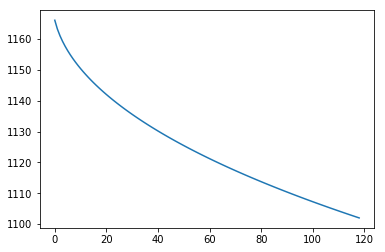

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(temp)
plt.show()


# Calculation of heat 

In this section we solve general 2d heat equation using fipy library.

In [5]:
from fipy import *
import numpy as np

Define some common mesh values for 2D heat flow. We create uniform cylinder mesh on which we solve axisymmetric case.

In [6]:
steps = 100
N = 40
L = 2.5*N/400
dL = L / N
dt = 1.
mesh = CylindricalGrid2D(dx = dL, dy = dL, nx = N, ny = N)

In [7]:
temperature = CellVariable(mesh = mesh, name='temperature',value=1173., hasOld=True)
(r,z) = mesh.cellCenters()

Initial temperature of the cylinder and surface is set to:
$T_o= 1173K$.
Boundary condition at $y=0$ is given by convection cooling condition:
$$
-k \frac{\partial T}{\partial n} = h_{rc}(T) (T-T_{\infty})
$$

The boundary condition on the $x=0$ left side of the domain is isolated:
$$
-k \frac{\partial T}{\partial n} = 0
$$
The temperature on the top and right side of cylinder are set to surounding temperature:
$T_0 = T_{\infty}$

In [8]:
vh = np.vectorize(h)
#temperature.faceGrad.dot([0,1]).constrain(-vh(temperature.faceValue)*1/k*(temperature.faceValue-t_inf),mesh.facesBottom)
temperature.faceGrad.dot([0,1]).constrain(0,mesh.facesBottom)
temperature.faceGrad.dot([1,0]).constrain(0,mesh.facesLeft)
#temperature.constrain(t_inf, mesh.facesRight)
temperature.constrain(1173., mesh.facesTop)
fluxBottom = vh(temperature.faceValue)*(temperature.faceValue-t_inf)

Now setup the temperature equation for now we dont have a source term comming from the phase transformations.

In [9]:
temperatureEq = TransientTerm(coeff=rho*Cp,var=temperature) == DiffusionTerm(coeff=k,var=temperature)+(mesh.facesBottom*fluxBottom).divergence

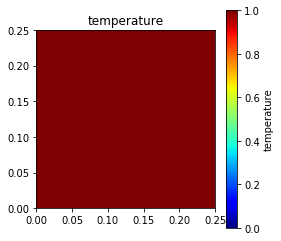

In [10]:
if __name__ == '__main__':
    temperatureViewer = Viewer(vars=temperature,figaspect=1,datamin=0,datamax=1200)

We step the solution in time, plotting as we go interactively

In [11]:
#import fipy.solvers.pyAMG as solvers
import fipy.solvers.pysparse as solvers
import numpy as np
solver = solvers.linearGMRESSolver.LinearGMRESSolver(precon=None, iterations=1500, tolerance=1e-15) 
poisson= solvers.linearLUSolver.LinearLUSolver()

steps = 120
Tvstime = [] # temperature values during cooling

for i in range(steps):
    temperature.updateOld()
    #print temperature
    temperatureEq.solve(temperature, dt=dt,solver=solver)
    
    if __name__ == '__main__':
        path = "../../TEST/temperature/"
        temperatureViewer.plot(path+"temperature"+str(i)+".eps")  
        np.savetxt(path+"temperature"+str(i),temperature)
        Tvstime.append(temperature.value[0])
        print "step: ", i, "Min. temperature",min(temperature), "Max. temperature", max(temperature)
        

step:  0 Min. temperature 1170.6348161526162 Max. temperature 1173.0000000000007
step:  1 Min. temperature 1168.5794854576031 Max. temperature 1173.000000000001
step:  2 Min. temperature 1166.7594729524785 Max. temperature 1173.0000000000014
step:  3 Min. temperature 1165.122047471125 Max. temperature 1173.0000000000014
step:  4 Min. temperature 1163.629237891398 Max. temperature 1173.0000000000018
step:  5 Min. temperature 1162.2532073136272 Max. temperature 1173.0000000000018
step:  6 Min. temperature 1160.9731802405324 Max. temperature 1173.0000000000018
step:  7 Min. temperature 1159.773376617443 Max. temperature 1173.0000000000018
step:  8 Min. temperature 1158.641605182679 Max. temperature 1173.0000000000018
step:  9 Min. temperature 1157.5682931091192 Max. temperature 1173.000000000002
step:  10 Min. temperature 1156.5458075592614 Max. temperature 1173.0000000000023
step:  11 Min. temperature 1155.5679748109746 Max. temperature 1173.0000000000025
step:  12 Min. temperature 1154.

step:  101 Min. temperature 1112.718298949154 Max. temperature 1172.99999993651
step:  102 Min. temperature 1112.4109306997034 Max. temperature 1172.9999999271038
step:  103 Min. temperature 1112.1052279448588 Max. temperature 1172.9999999164704
step:  104 Min. temperature 1111.8011666716654 Max. temperature 1172.9999999044724
step:  105 Min. temperature 1111.4987234361533 Max. temperature 1172.999999890959
step:  106 Min. temperature 1111.197875344657 Max. temperature 1172.9999998757662
step:  107 Min. temperature 1110.8986000359155 Max. temperature 1172.9999998587155
step:  108 Min. temperature 1110.600875663914 Max. temperature 1172.9999998396122
step:  109 Min. temperature 1110.3046808814279 Max. temperature 1172.999999818245
step:  110 Min. temperature 1110.009994824241 Max. temperature 1172.999999794386
step:  111 Min. temperature 1109.7167970959927 Max. temperature 1172.9999997677871
step:  112 Min. temperature 1109.425067753638 Max. temperature 1172.9999997381808
step:  113 Min

<Figure size 432x288 with 0 Axes>

In [12]:
tempload = np.loadtxt(path+"temperature99")

<a list of 8 text.Text objects>

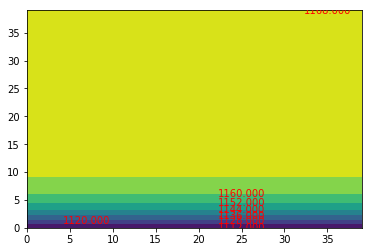

In [13]:
m = tempload.reshape(N,N)
cm = plt.contourf(m)
plt.clabel(cm,colors='r')

In [14]:
%matplotlib inline
temperatureViewer.plot(path + "temperature99.png")

<Figure size 432x288 with 0 Axes>

Plotting the value of the temperature in the middle of the cylinder at the convection surface.

In [15]:
for i in range(1,120,10):
    load = np.loadtxt(path+"temperature"+str(i))
    t = load.reshape(N,N)[1,35]
    print t
    

1172.0905154685818
1164.1826503704103
1157.242926370178
1151.4258487840232
1146.3646380140997
1141.8427732595678
1137.7282406640716
1133.9346661105099
1130.402160703508
1127.0872736028755
1123.9573317099507
1120.9870489490424


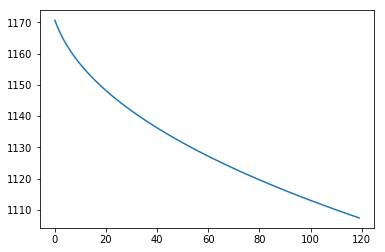

In [16]:
plta = plt.plot(Tvstime)

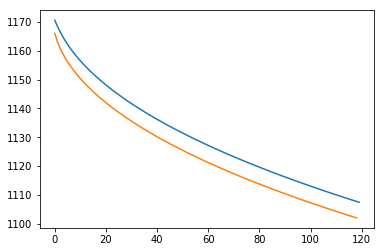

In [17]:
plt.plot(Tvstime)
plt.plot(temp)
plt.show()